# Clustering hospitals according to their bed capacity:

Suppose a crisis management board has been initiated and wants to learn the hospital characteristics in terms of their capabilities to handle the high utilisation event of COVID-19. Your task is to conduct clustering on this dataset and describe the minimum number of effective clusters identified.

1. [Identify the data quality problems in this dataset such as unusual data types, missing values, etc., and explain how to fix them.](#missing_value)
2. Build a clustering model to profile the hospitals based on the beds and ventilators' capacity. Answer the following:
    * [What clustering algorithm have you used?](#k_means)
    * [List the attributes used in this analysis.](#attri)
    * [What is the optimal number of clusters identified? How did you reach this optimal number? ](#elbow)
    * [Did you normalise the variables? What was its effect on the model—does the variable normalisation process enable a better clustering solution?](#norm)
3. For the model with the optimal number of clusters:
    * [visualise the clusters using ‘pairplot’ and interpret the visualisation](#pairplot)
    * [characterise the nature of each cluster by giving it a descriptive label and a brief description. Hint: use cluster distribution..](#pairplotExp)
4. Build another clustering model to [profile the hospitals based on the service provided as well as their beds and ventilators’ capacity.](#case2) Use the best setting (e.g. [variable normalisations](#norm2), optimal K, etc.) obtained in the previous model. Answer the following:
    * [What clustering algorithm have you used?](#kproto)
    * [List the attributes used in this analysis.](#attri2)
    * [What difference do you see in this clustering interpretation when compared to the previous one?](#differ)
 

In [2]:
#importing Libaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes


In [3]:
#reading data from csv file 
df=pd.read_csv("usa_hospital_beds.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                6622 non-null   float64
 1   Y                                6622 non-null   float64
 2   OBJECTID                         6640 non-null   int64  
 3   HOSPITAL_NAME                    6640 non-null   object 
 4   HOSPITAL_TYPE                    6640 non-null   object 
 5   HQ_ADDRESS                       6640 non-null   object 
 6   HQ_CITY                          6640 non-null   object 
 7   HQ_STATE                         6640 non-null   object 
 8   HQ_ZIP_CODE                      6640 non-null   int64  
 9   COUNTY_NAME                      6615 non-null   object 
 10  STATE_NAME                       6615 non-null   object 
 11  NUM_LICENSED_BEDS                6444 non-null   float64
 12  NUM_STAFFED_BEDS    

In [5]:
df

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,COUNTY_NAME,STATE_NAME,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-112.066157,33.495498,1,Phoenix VA Health Care System (AKA Carl T Ha V...,VA Hospital,650 E Indian School Rd,Phoenix,AZ,85012,Maricopa,Arizona,129.0,129.0,0,0,NaN,0,0.0
1,-110.965885,32.181263,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,Tucson,AZ,85723,Pima,Arizona,295.0,295.0,2,2,NaN,0,2.0
2,-119.779742,36.773323,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,Fresno,CA,93703,Fresno,California,57.0,57.0,2,2,NaN,0,2.0
3,-72.957610,41.284400,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,West Haven,CT,6516,New Haven,Connecticut,216.0,216.0,1,1,NaN,0,2.0
4,-75.606533,39.740206,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,Wilmington,DE,19805,New Castle,Delaware,60.0,60.0,0,0,NaN,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6635,-93.712727,32.449542,6636,Shreveport Rehabilitation Hospital,Rehabilitation Hospital,1451 Fern Cir,Shreveport,LA,71105,Caddo,Louisiana,NaN,NaN,0,0,NaN,0,NaN
6636,-76.151657,36.788612,6637,Pleasant Valley Medical Center,Short Term Acute Care Hospital,4221 Pleasant Valley Rd,Virginia Beach,VA,23464,Virginia Beach,Virginia,NaN,NaN,0,0,NaN,0,NaN
6637,-91.099236,30.399164,6638,Sage Specialty Hospital - Baton Rouge,Short Term Acute Care Hospital,8225 Summa Ave,Baton Rouge,LA,70809,East Baton Rouge,Louisiana,NaN,NaN,0,0,NaN,0,NaN
6638,-80.815620,34.189204,6639,Midlands Regional Rehabilitation Hospital,Rehabilitation Hospital,20 Pinnacle Pkwy,Elgin,SC,29045,Kershaw,South Carolina,NaN,NaN,0,0,NaN,0,NaN


In [6]:
df.describe()

,X,Y,OBJECTID,HQ_ZIP_CODE,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
count,6622.000000,6622.000000,6640.000000,6640.000000,6444.000000,6360.000000,6640.000000,6640.000000,5907.000000,6640.000000,6521.000000
mean,-92.566564,37.524093,3320.500000,53912.605120,148.954997,128.712107,13.932530,13.932530,0.493387,21.273645,3.568471
std,16.104124,5.692132,1916.947226,27246.998958,181.836163,159.023374,22.430713,22.430713,0.235928,70.096080,5.478285
min,-170.685773,-14.290190,1.000000,603.000000,1.000000,1.000000,0.000000,0.000000,0.000329,-883.000000,0.000000
25%,-98.285496,33.580311,1660.750000,32419.250000,26.000000,25.000000,3.000000,3.000000,0.301370,0.000000,0.000000
50%,-90.152566,38.240635,3320.500000,55395.500000,76.500000,67.000000,6.000000,6.000000,0.498326,0.000000,2.000000
75%,-82.031227,41.441194,4980.250000,76464.250000,199.000000,168.000000,16.000000,16.000000,0.678513,22.000000,4.000000
max,145.724170,71.298900,6640.000000,99929.000000,2059.000000,2247.000000,310.000000,310.000000,1.000000,1446.000000,61.000000


<a id="attri"></a>
# Build a clustering model to profile the hospitals based on the beds and ventilators' capacity. 


In [7]:
#Creating new Dataframe for clustering 
Cluster_df=df[["NUM_STAFFED_BEDS","AVG_VENTILATOR_USAGE"]]
Cluster_df.describe()

,NUM_STAFFED_BEDS,AVG_VENTILATOR_USAGE
count,6360.000000,6521.000000
mean,128.712107,3.568471
std,159.023374,5.478285
min,1.000000,0.000000
25%,25.000000,0.000000
50%,67.000000,2.000000
75%,168.000000,4.000000
max,2247.000000,61.000000


<a id="missing_value"></a>

In [68]:
Cluster_df.shape

(6640, 2)

In [69]:
Cluster_df.count()

NUM_STAFFED_BEDS        6360
AVG_VENTILATOR_USAGE    6521
dtype: int64

## Missing Values in clustering 


It looks like we are missing some value from Beds and Ventilator. Here imputing missing value with zero is not advised since **K-means** is based on distance and zero will extreme value which can make our cluster baised. 
For this case we will be replacing missing value of Bed with average and Ventilator with median .

In [70]:
# replacing missing value of bed with mean which is 128.We got this value from describe function
Cluster_df['NUM_STAFFED_BEDS'].fillna(128, inplace = True)

c:\users\gk\documents\environments\venv\lib\site-packages\pandas\core\series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [71]:
# replacing missing value of Ventilator with median which is 2.We got this value from describe function
Cluster_df['AVG_VENTILATOR_USAGE'].fillna(2, inplace = True)

## Checking if any value in dataframe is missing 

In [72]:
Cluster_df.isnull().values.any()

False

<a id="elbow"></a>
## Determining  𝐾 with Elbow Method

**K-Mean** is unsuperved learning algorithm where we are required to predetermine value of K. K is number of clusters which is key to our clustering process. While there are number of methods like **empirical method ,elbow method ,cross-validation method**. We will using **Elbow Method** particular for this problem . 
Elbow Method will factor in **inertia**. Inertia is mean squared distance between data point and their centeriod.

It should be noted that each time number of clusters increases , total variation decrease. Mathematically there are inversely propertional. It is obvious that total variation will zero only number of cluster is equal to data point.   

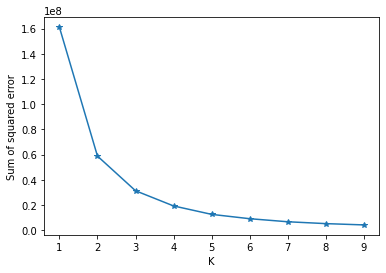

In [73]:
#Sum of Squared SSE is used
sse = []

for k in range(1,10):
    clustering = KMeans(n_clusters=k)
    clustering.fit(Cluster_df[['NUM_STAFFED_BEDS','AVG_VENTILATOR_USAGE']])
    sse.append(clustering.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10), sse, marker='*')

In above **Elbow Plot** we observe that until **K**=3 we have significant decrease in Squared Error.We can see there is no steep change.We will be taking K=3 for this clustering accepting default parameters

<a id="k_means"></a>
# K-Means Clustering 


K-means clustering is capable of handling large numeric datatype. It is based on eucladian distance between data point and center of cluster hence it is based on continous data type and are poor in handling catagorical data. 
K-means clustering suffers from distance meansure problem. If there is difference in scale of variable, variable with larger scale will be dominate over another variable. To overcome this problem , we will be normalising our data. We will use MinMaxScaler scaler for this problem.  

<a id="norm"></a>

In [74]:
#Data Scaling 
from sklearn.preprocessing import MinMaxScaler
# 
X = Cluster_df.to_numpy()

# scaling
 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.0569902 , 0.        ],
       [0.13089938, 0.03278689],
       [0.02493321, 0.03278689],
       ...,
       [0.05654497, 0.03278689],
       [0.05654497, 0.03278689],
       [0.05654497, 0.03278689]])

# Clustering using Kmeans and appending cluster ID to our clustered dataframe

In [75]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3)
clustering.fit(X)
y = clustering.predict(X)
Cluster_df['Cluster_ID'] = y


<ipython-input-75-aaae445bc6fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_df['Cluster_ID'] = y


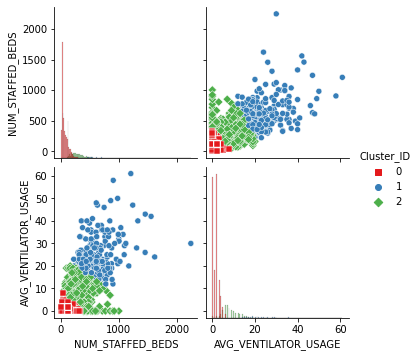

In [76]:
import seaborn as sns
cluster_g = sns.pairplot(Cluster_df, hue='Cluster_ID',diag_kind='hist' ,markers=["s", "o", "D"],palette="Set1")
plt.show()

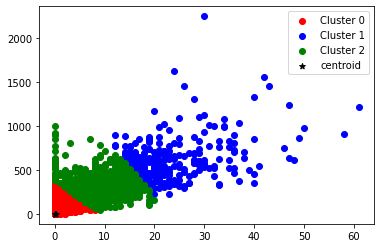

In [77]:
#creating dataframe with scaled value to plot Centroid

df1 = Cluster_df[Cluster_df.Cluster_ID==0]
df2 = Cluster_df[Cluster_df.Cluster_ID==1]
df3 = Cluster_df[Cluster_df.Cluster_ID==2]
plt.scatter(df1.AVG_VENTILATOR_USAGE,df1.NUM_STAFFED_BEDS,color='Red',label='Cluster 0')
plt.scatter(df2.AVG_VENTILATOR_USAGE,df2.NUM_STAFFED_BEDS,color='Blue',label='Cluster 1')
plt.scatter(df3.AVG_VENTILATOR_USAGE,df3.NUM_STAFFED_BEDS,color='green',label='Cluster 2')
plt.scatter(clustering.cluster_centers_[:,0],clustering.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

<a id="pairplot"></a>
# Nature of each clusters using cluster distribution.

One of the way to study the charactertis of cluster is by using **distribution plot**. We will be using bin size of 25 which should be appropriate to our data size. We will plot cluster distribution agains the data distribution. This should gives us and idea characteristics of our cluster. Using K-means we were able to form 3 cluster. We will be inspeculating all 3 clusters one by one. 
We will be using following code courtesy of Associate Professor Richi Nayak.

Distribution for cluster 0


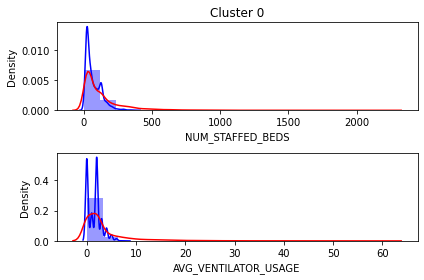

Distribution for cluster 1


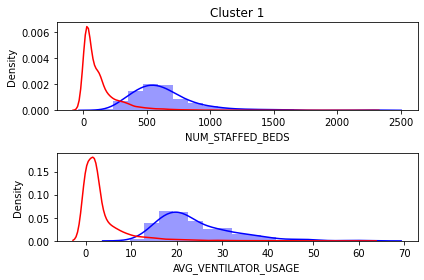

Distribution for cluster 2


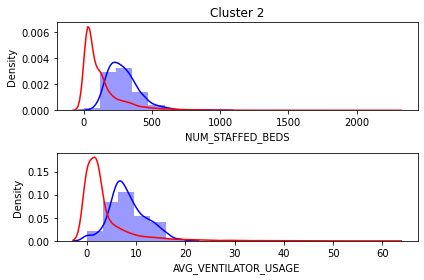

In [78]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# prepare the column and bin size. Increase bin size to be more specific, but 25 is more than enough
cols = ['NUM_STAFFED_BEDS', 'AVG_VENTILATOR_USAGE']
n_bins = 25

# inspecting cluster 0 and 1
clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=2)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(Cluster_df[col]), max(Cluster_df[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(Cluster_df[Cluster_df['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j],norm_hist=True,color="b" )
        # plot the normal distribution with a black line
        sns.distplot(Cluster_df[col], bins=bins, ax=ax[j], hist=False, color="r")

    plt.tight_layout()
    plt.show()

<a id="pairplotExp"></a>
Note:distribution of all record is red and cluster distribution is blue. 
###  Cluster character
  
* Cluster 1:Number of staffed bed and ventilator usage is more or less inline with all data distribution. This cluster consists of hospital with least number of bed and ventilator usage in compared to the rest of hospital
* Cluster 2:Cluster 2 distribution is leaning away from all data distribution toward right. This shows that the hospital in this distribution have more bed capacity and more ventilator usage. 
* Cluster 0:The cluster distribution consists middle tier hospital in term of bed numbers. They definately have more number of bed than cluster 1 but less than cluster 2.   

<a id="case2"></a>
# Profile the hospitals based on the service provided as well as their beds and ventilators’ capacity.

<a id="attri2"></a>
We are now clustering on basis of hospital type. Selecting appropriate attribute i.e. HOSPITAL_TYPE. Hospital type is catagorical datatype.

In [4]:
Cluster_df2=df[["HOSPITAL_TYPE","NUM_STAFFED_BEDS","AVG_VENTILATOR_USAGE"]]

In [5]:
Cluster_df2["HOSPITAL_TYPE"].unique()

array(['VA Hospital', 'Short Term Acute Care Hospital',
       'Critical Access Hospital', 'Childrens Hospital',
       'Long Term Acute Care Hospital', 'Psychiatric Hospital',
       'Rehabilitation Hospital',
       'Religious Non-Medical Health Care Institution',
       'Department of Defense Hospital'], dtype=object)

In [6]:
Cluster_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HOSPITAL_TYPE         6640 non-null   object 
 1   NUM_STAFFED_BEDS      6360 non-null   float64
 2   AVG_VENTILATOR_USAGE  6521 non-null   float64
dtypes: float64(2), object(1)
memory usage: 129.8+ KB


Handling missing values with standard mean and median

In [19]:
# replacing missing value of bed with mean which is 128.We got this value from describe function
Cluster_df2['NUM_STAFFED_BEDS'].fillna(128, inplace = True)
# replacing missing value of Ventilator with median which is 2.We got this value from describe function
Cluster_df2['AVG_VENTILATOR_USAGE'].fillna(2, inplace = True)

c:\users\gk\documents\environments\venv\lib\site-packages\pandas\core\series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [20]:
Cluster_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HOSPITAL_TYPE         6640 non-null   int64  
 1   NUM_STAFFED_BEDS      6640 non-null   float64
 2   AVG_VENTILATOR_USAGE  6640 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 155.7 KB


In [23]:
Cluster_df2.isnull().values.any()

False

In [26]:
Cluster_df2

,HOSPITAL_TYPE,NUM_STAFFED_BEDS,AVG_VENTILATOR_USAGE
0,1,129.0,0.0
1,1,295.0,2.0
2,1,57.0,2.0
3,1,216.0,2.0
4,1,60.0,1.0
...,...,...,...
6635,7,128.0,2.0
6636,2,128.0,2.0
6637,2,128.0,2.0
6638,7,128.0,2.0


In [7]:
#Mapping catagorical value
hospital_map = {'VA Hospital':1, 'Short Term Acute Care Hospital': 2, 'Critical Access Hospital': 3, 'Childrens Hospital': 4, 'Long Term Acute Care Hospital': 5, 'Psychiatric Hospital': 6,'Rehabilitation Hospital':7,'Religious Non-Medical Health Care Institution':8,'Department of Defense Hospital':9}
Cluster_df2["HOSPITAL_TYPE"] = Cluster_df2["HOSPITAL_TYPE"].map(hospital_map)

<ipython-input-7-b0bed99e0303>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_df2["HOSPITAL_TYPE"] = Cluster_df2["HOSPITAL_TYPE"].map(hospital_map)


In [10]:
Cluster_df2["HOSPITAL_TYPE"].count()

6640

In [25]:
Cluster_df2.isnull().values.any()

False

<a id="norm2"></a>
# Data scaling for K-Prototype

In [24]:
#Data Scaling 
from sklearn.preprocessing import MinMaxScaler
# 
X1 = Cluster_df2.to_numpy()

# scaling
 
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
X1

array([[0.        , 0.0569902 , 0.        ],
       [0.        , 0.13089938, 0.03278689],
       [0.        , 0.02493321, 0.03278689],
       ...,
       [0.125     , 0.05654497, 0.03278689],
       [0.75      , 0.05654497, 0.03278689],
       [0.125     , 0.05654497, 0.03278689]])

<a id="kproto"></a>
# K-prototype Clustering
We are dealing with combination of Catagorical and numeric data type. We won't be able to use K-means Clustering since it cannot properly handle catagorical data instead we will be using Kprototype clustering. Kprototype can handle mixed datatype. Determining the K can be trickly since we dont have squared error or inertia. We will be using cost_ to calculate optimium K value

In [35]:
# list to save the clusters and cost
clusters = []
cost_vals = []

# this whole process should take a while
for k in range(2, 10):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=10, n_jobs=10)
    model.fit_predict(X1, categorical=[0])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

Ploting to use Elbow method. We can see K can be any value from 4 to 6. We would normally use silhouette score to find optimium K which is resources hungry. The silhouette coefficient is calculated for both numeric and categorical and average is taken. Silhouette range from -1 to 1. Higher the value is better the cluster will be. For this problem we will taking K=5 from below graph which seems quite right.

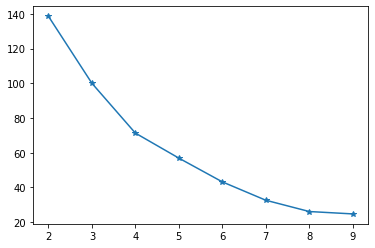

In [36]:
# plot the cost vs K values
plt.plot(range(2,10), cost_vals, marker='*')
plt.show()

Ploting Cluster and appending cluster to dataframe

<ipython-input-40-30ac52ca93c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_df2['Cluster_ID'] = y


Cluster membership
3    3151
2    1365
1    1096
4     540
0     488
Name: Cluster_ID, dtype: int64


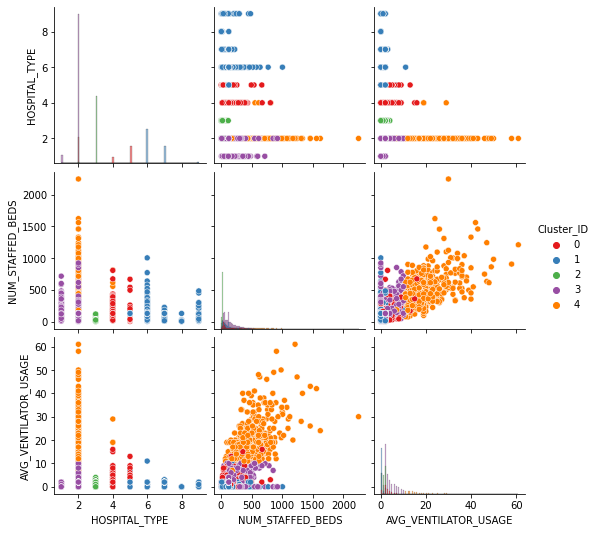

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
model = clusters[3]
y=model.fit_predict(X1, categorical=[1]) 
Cluster_df2['Cluster_ID'] = y 

# how many records are in each cluster
print("Cluster membership")
print(Cluster_df2['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(Cluster_df2, hue='Cluster_ID',diag_kind='hist',palette="Set1")
plt.show()
    

Distribution for cluster 0


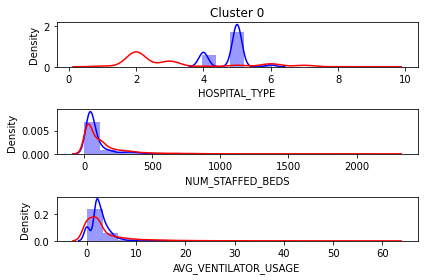

Distribution for cluster 1


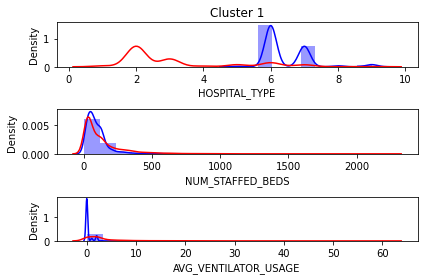

Distribution for cluster 2


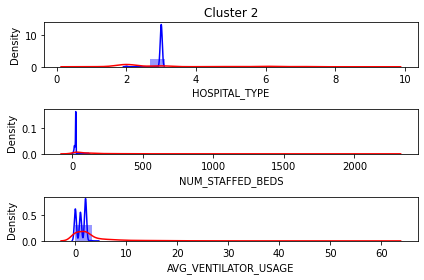

Distribution for cluster 3


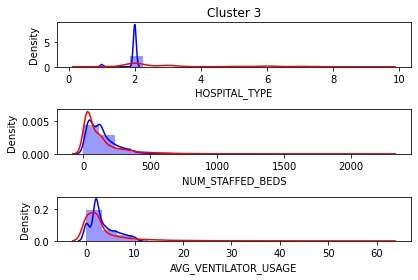

Distribution for cluster 4


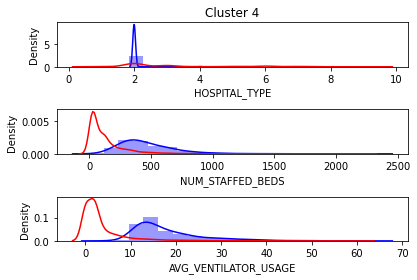

In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# prepare the column and bin size. Increase bin size to be more specific, but 25 is more than enough
kcols = ['HOSPITAL_TYPE','NUM_STAFFED_BEDS', 'AVG_VENTILATOR_USAGE']
n_bins = 25

# inspecting cluster 0 and 1
kclusters_to_inspect = [0,1,2,3,4]

for kcluster in kclusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(kcluster))

    # create subplots
    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(kcluster))

    for j, col in enumerate(kcols):
        # create the bins
        bins = np.linspace(min(Cluster_df2[col]), max(Cluster_df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(Cluster_df2[Cluster_df2['Cluster_ID'] == kcluster][col], bins=bins, ax=ax[j],norm_hist=True,color="b" )
        # plot the normal distribution with a black line
        sns.distplot(Cluster_df2[col], bins=bins, ax=ax[j], hist=False, color="r")

    plt.tight_layout()
    plt.show()

<a id="differ"></a>
This cluster comparises of hospital type in addition to bed and ventilator. 
* Cluster 0: This cluster consist of **Long Term Acute Care Hospital** (5) along with fair number of **childern hospital**(4). 
* Cluster 1: This cluster consist of **Psychiatric Hospital**(6) along with **Rehabilitation Hospital**(7)
* Cluster 2: This cluster consist of **Critical Access Hospital**(3) 
* Cluster 3: This cluster is quite unique than rest of cluster. We can observe that most this cluster comparise of **Critical Access Hospital**(2). Number of bed and ventilator use is inline with total data distribution.
* Cluster 4: This cluster consist of less number of hospital but we can see that it has larger  number of bed and average number of ventilator usage is higher. This cluster must consist of big hospitals.